<a href="https://colab.research.google.com/github/AiNguyen237/ISLR_lab_using_Python/blob/main/Linear_Regression/Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSL9gfxzFYTbNPHc_Ion4DY1OTnpVFoTLJsJw&usqp=CAU)

In [1]:
#@title Import libraries
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import random

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [231]:
#@title Helper Functions
def relation_plot(X, y):
  """
  Function to plot the relationship between the predictor and response
  """
  plt.figure(figsize=(10,5))
  sns.regplot(X,y, scatter_kws={'color':'r', 's': 9})
  plt.show()

def diagnostic_plots(results):

  """
  Function used to plot the diagnostic plots 
  """

  # Get the predicted values for the original design 
  fitted_values = results.fittedvalues

  # Get the residuals of the model 
  residuals = results.resid

  # Get the studentized standardized residuals 
  standardized_residuals = results.get_influence().resid_studentized_internal

  # Get the abs square root studentized standardized residuals 
  sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

  # Get model leverage
  leverage = results.get_influence().hat_matrix_diag

  # Get cook's distance to calculate the leverage points
  cook_dist = results.get_influence().cooks_distance[0]

  plt.figure(figsize=(20,5))
  # Create the Residuals vs. Fit plot 
  plt.subplot(141)
  sns.residplot(x = fitted_values, y = residuals, 
                lowess = True, 
                scatter_kws = {'alpha':0.5},
                line_kws = {'color':'red', 'lw':2, 'alpha': 0.8})

  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs. Fitted')

  # Create the QQ-plot
  plt.subplot(142)
  stats.probplot(standardized_residuals, plot = plt)
  plt.ylabel('Standardized residuals')
  plt.title('Normal Q-Q')

  # Create Scale-Location plot 
  plt.subplot(143)
  sns.regplot(x = fitted_values, y = sqrt_standardized_residuals,
              lowess = True, 
              line_kws = {'color':'red', 'lw':2, 'alpha': 0.8},
              scatter_kws = {'alpha':0.5})
  plt.xlabel('Fitted values')
  plt.ylabel('Square root standardized residuals')
  plt.title('Scale Location plot')

  # Create the Residuals vs. Leverage
  plt.subplot(144)
  sns.regplot(x = leverage, y = standardized_residuals,
              lowess = True,
              line_kws = {'color':'red', 'lw':2, 'alpha': 0.8},
              scatter_kws = {'alpha':0.5})
  plt.xlabel('Leverages')
  plt.ylabel('Standardized residuals')
  plt.title('Residuals vs. Leverage')

  # Annotate the 3 leverage points
  leverage_top_3 = np.flip(np.argsort(cook_dist), 0)[:3]
  for i in leverage_top_3:
    plt.annotate(i, xy = (leverage[i], standardized_residuals[i]))

  plt.show()

def poly(x, p):
  """
  Performing QR decomposition in order to getting Polynomial Features based on p degree

  Input: 
  1. x features 
  2. p degree

  Output:
  """
  x = np.array(x)
  # Using np.vstack() to stack all the rows of different degree of on top of each other 
  # Then use np.transpose to transpose all the rows into columns 
  x = np.transpose(np.vstack((x**k for k in range(p+1))))
  x = np.linalg.qr(x)[0][:,1:]
  return x


# ``AUTO`` DATASET

## Question 8

In [3]:
# Load the dataset 
auto = pd.read_csv('https://raw.githubusercontent.com/dsnair/ISLR/master/data/csv/Auto.csv')

In [4]:
# Let's investigate the dataset 
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


(a) Perform a simple linear regression with ``mpg`` as the response and ``horsepower`` as the predictor. Comment on the output.



  (i) Is there a relationship between the predictor and the response?

  (ii) How strong is the relationship between the predictor and the response?

  (iii) Is the relationship between the predictor and response positive and negative?

  (iv) What is the predicted ``mpg`` associated with a ``horsepower`` of 98? What are the associated 95% confidence and prediction intervals ?

In [5]:
# Assign X, y 
X = sm.add_constant(auto[['horsepower']])
y = auto['mpg']

In [6]:
# Print out the summary of the simple linear regression
lr = sm.OLS(y, X)
result = lr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           7.03e-81
Time:                        03:32:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [7]:
X.loc[X['horsepower']  == 98]

,const,horsepower
177,1.0,98
226,1.0,98


In [8]:
# Getting the predictions of mpg given the horsepower = 98
predictions = result.get_prediction(X.iloc[177])
predictions.summary_frame(alpha=0.5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
const,24.467077,0.251262,24.297445,24.636709,21.150765,27.78339
horsepower,24.467077,0.251262,24.297445,24.636709,21.150765,27.78339


(i) There is definitely a relationship between the predictor and the response because the T-statistic is high and the p-value is close to 0.

(ii) The R2 is ``0.606`` OR ``horsepower`` explains 61% of the variability of the response that is explained by the predictor.

(iii) Since the coefficient is negative, the relationship between these two is negative (shown clearer in the plot below)

(iv) 
- The predicted ``mpg`` associated with ``horsepower`` = 98 is 24.246. 
- The prediction intervals for it is 21.15 to 27.7
- The confidence intervals 24.297 and 24.637



(b) Plot the response and the predictor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


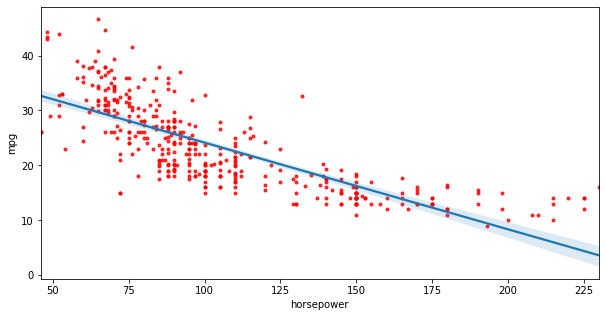

In [9]:
# Plot out the relationship between the predictor and response 
relation_plot(auto[['horsepower']], y)

(c) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

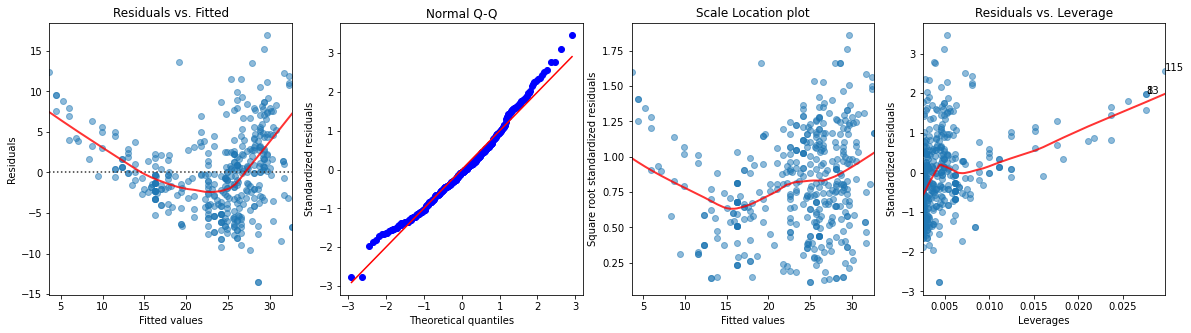

In [10]:
diagnostic_plots(result)

- Residuals vs. Fitted graph indicates a clear non-linearity between the response and the predictor -> meaning we are underfitting the model.
- Based on the Normal Q-Q plot indicates that the errors are quite normally distributed.
- From the Scale Location plot we can see that it is suffering from heterodasticity since the plot isn't a straight line and the points are clustered toward the right side.
- Residuals vs. Leverage reveals some observations that have high leverages statistics

## Question 9

(a) Produce a scatterplot matrix which includes all the variables in the dataset

<Figure size 1440x1080 with 0 Axes>

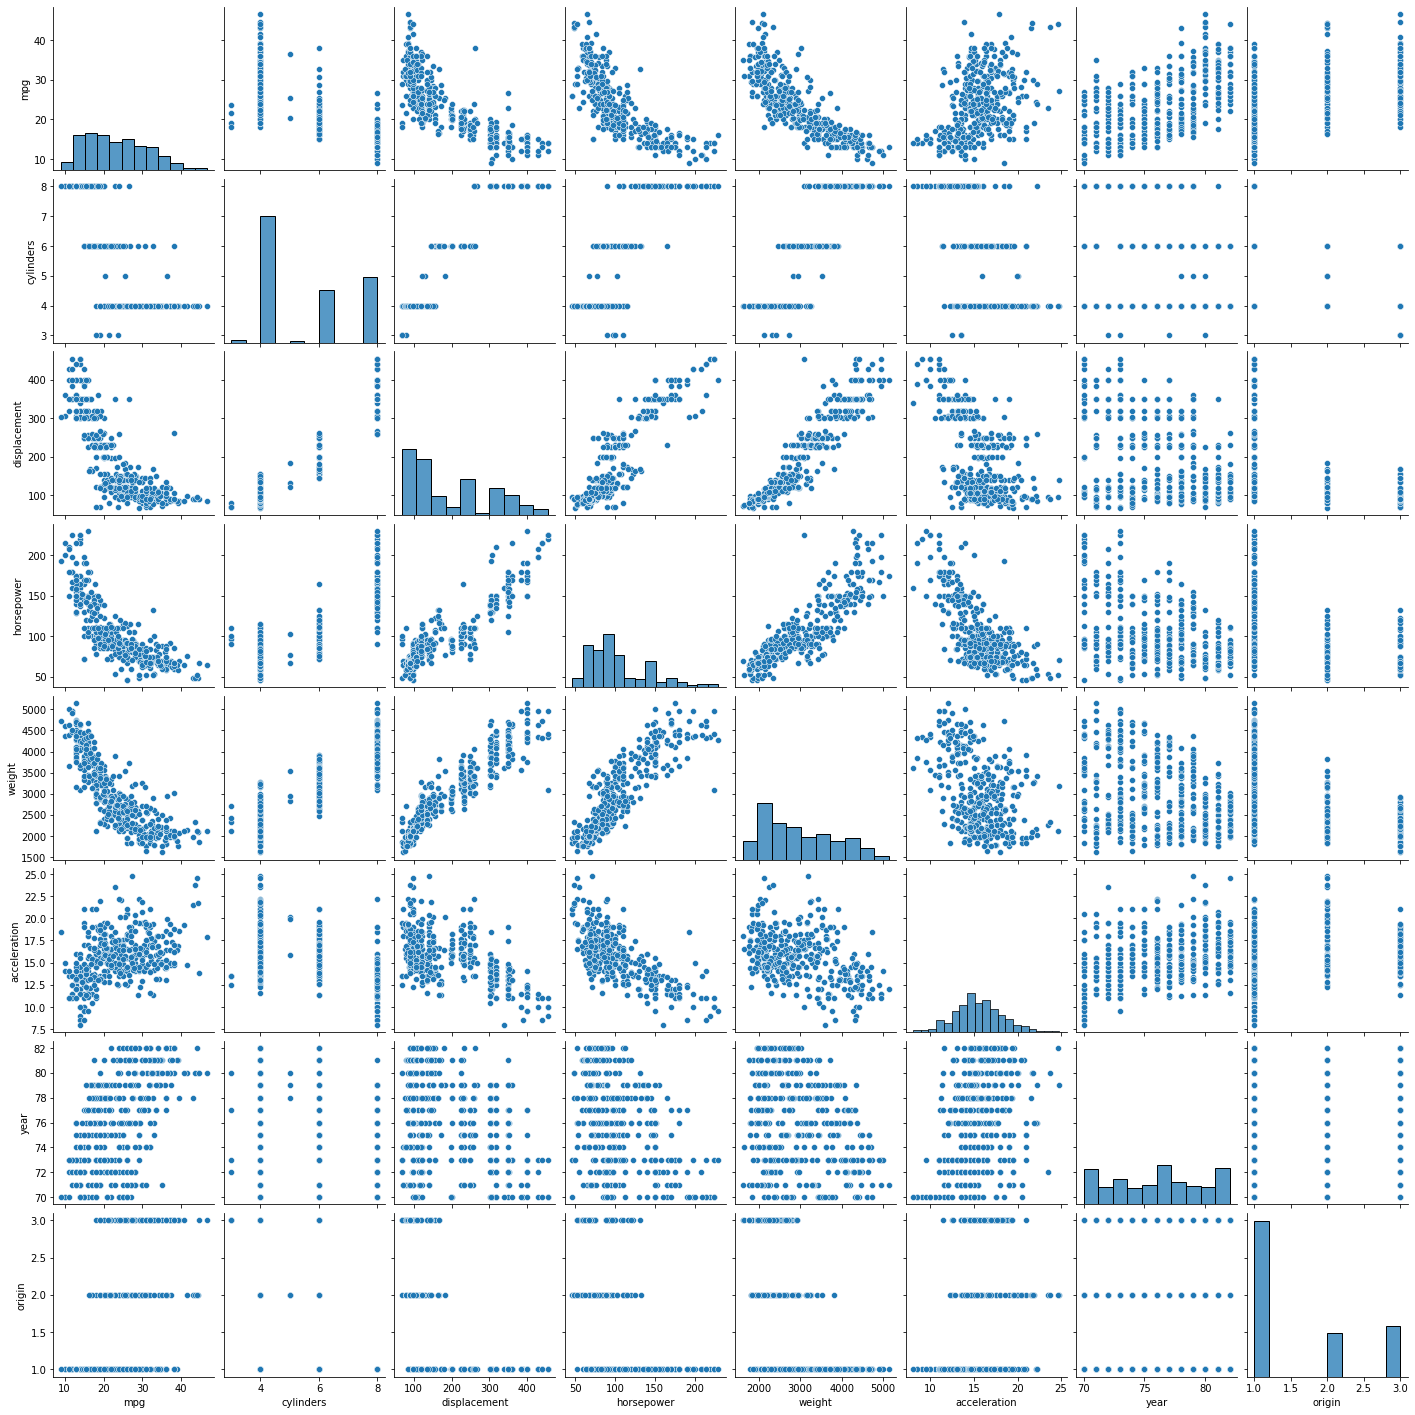

In [11]:
# For scatterplot matrix in seaborn use the sns.pairplot
plt.figure(figsize=(20,15))
sns.pairplot(data=auto)
plt.show()

(b) Compute the matrix of correlations between the variables. You will need to exclude the ``name`` variable, which is qualitative.

In [12]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Variables that have high correlation with `mpg`: 
- cylinders 
- displacement 
- horsepower 
- weight 
- year 

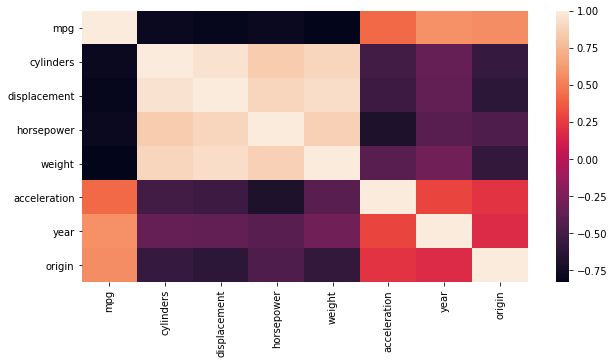

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data = auto.corr())
plt.show()

(c) Perform a multiple linear regression with ``mpg`` as the response and all other variables except ``name`` as the predictors. Comment on the output. For instance:

In [14]:
# Check for the qualitative data beside name: origin 
auto.origin.unique()

array([1, 3, 2])

1. American 
2. European 
3. Japanese 

Create a One-hot Encoding for `origin` variable

In [15]:
def origin(x):
  if x == 1:
    return 'American'
  elif x == 2:
    return 'European'
  else:
    return 'Japanese'

In [16]:
auto.origin = auto.origin.apply(origin)

In [17]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


In [18]:
# Encoding the columns origin into European and Japanese
X = pd.get_dummies(data=auto, drop_first=True, columns = ['origin'])

In [19]:
X = sm.add_constant(X.drop(['mpg', 'name'], axis = 1))
y = auto['mpg']

mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.79e-139
Time:                        03:33:04   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.9546      4.677     

i. Is there a relationship between the predictors and the response?

The F-statistics is 224.5 with a very small p-value indicating there is a clear relationship between the predictors and the response.

ii. Which predictors appear to have a statistically significant relationship to the response?

With a small value of p-values, except: 
- cylinders 
- horsepower 
- acceleration

iii. What does the coefficient for the ``year`` variable suggest?

The coefficient ``year`` variable suggests that if there is a year increase will lead to a 0.777 increase in ``mpg``.

(d) Plot the diagnostic plots of the linear regression fit. Comment on the problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

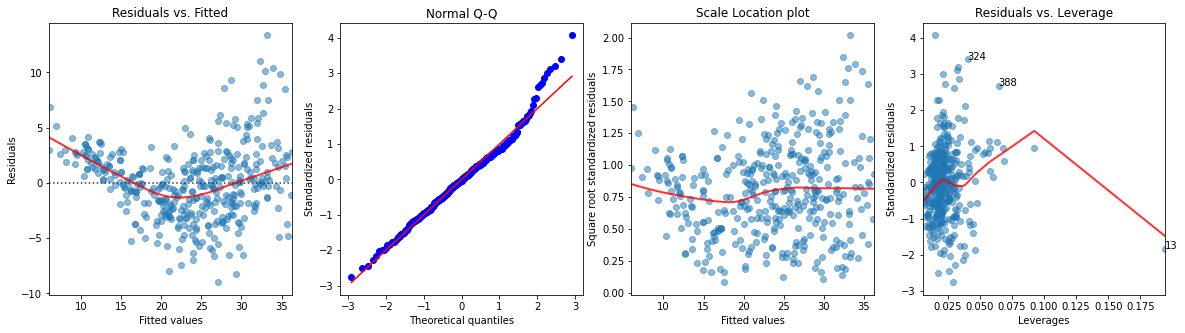

In [20]:
leverage = diagnostic_plots(mlr)

- Residuals vs. Fitted Plot: indicates a non-linearity in the relationship of the predictors and the response
- Residuals vs Leverage suggest there are observations that high leverage and also large outliers. 

Print out the high leverage and large outliers 

In [21]:
influence = mlr.get_influence()
print(influence.summary_frame().head())

   dfb_const  dfb_cylinders  ...  student_resid    dffits
0   0.076106       0.070457  ...       0.932184  0.143873
1   0.010407       0.006674  ...       0.292625  0.039777
2   0.047103       0.058683  ...       0.846434  0.125646
3   0.012639       0.028315  ...       0.307313  0.046453
4   0.051216       0.056224  ...       0.642419  0.104826

[5 rows x 15 columns]


In [22]:
summary_table = influence.summary_frame()
summary_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dfb_const            392 non-null    float64
 1   dfb_cylinders        392 non-null    float64
 2   dfb_displacement     392 non-null    float64
 3   dfb_horsepower       392 non-null    float64
 4   dfb_weight           392 non-null    float64
 5   dfb_acceleration     392 non-null    float64
 6   dfb_year             392 non-null    float64
 7   dfb_origin_European  392 non-null    float64
 8   dfb_origin_Japanese  392 non-null    float64
 9   cooks_d              392 non-null    float64
 10  standard_resid       392 non-null    float64
 11  hat_diag             392 non-null    float64
 12  dffits_internal      392 non-null    float64
 13  student_resid        392 non-null    float64
 14  dffits               392 non-null    float64
dtypes: float64(15)
memory usage: 46.1 KB


In [23]:
summary_table = summary_table[['cooks_d', 'hat_diag','standard_resid', 'student_resid', 'dffits']]
summary_table.head()

,cooks_d,hat_diag,standard_resid,student_resid,dffits
0,0.002301,0.023266,0.932344,0.932184,0.143873
1,0.000176,0.018142,0.292975,0.292625,0.039777
2,0.001755,0.021560,0.846747,0.846434,0.125646
3,0.000240,0.022338,0.307677,0.307313,0.046453
4,0.001223,0.025935,0.642912,0.642419,0.104826


In [24]:
summary_table.sort_values(by = 'cooks_d', ascending=False)[:10]

,cooks_d,hat_diag,standard_resid,student_resid,dffits
13,0.089495,0.194432,-1.826786,-1.832400,-0.900230
388,0.054687,0.064642,2.668656,2.690300,0.707246
324,0.054593,0.040638,3.405748,3.454004,0.710887
323,0.039127,0.033203,3.202114,3.241617,0.600734
242,0.035838,0.032310,3.108047,3.143888,0.574474
381,0.032367,0.034153,2.870189,2.897774,0.544910
320,0.028174,0.015066,4.071514,4.157157,0.514150
110,0.025719,0.029373,-2.765679,-2.790067,-0.485361
325,0.023393,0.029652,2.624805,2.645276,0.462420
327,0.022375,0.021688,3.013897,3.046301,0.453572


(e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [25]:
# Getting the formula for adding all the interaction terms between all the variables
X = auto.drop(['mpg', 'name'], axis = 1)
formula = 'mpg ~ '
for i in X.columns:
  X = X.drop(i, axis = 1)
  for j in X.columns:
    formula += f'{i}*{j} +'
  
formula = formula.rstrip('+')
print(formula)

mpg ~ cylinders*displacement +cylinders*horsepower +cylinders*weight +cylinders*acceleration +cylinders*year +cylinders*origin +displacement*horsepower +displacement*weight +displacement*acceleration +displacement*year +displacement*origin +horsepower*weight +horsepower*acceleration +horsepower*year +horsepower*origin +weight*acceleration +weight*year +weight*origin +acceleration*year +acceleration*origin +year*origin 


In [26]:
imlr = smf.ols(formula=formula, data=auto).fit()
print(imlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     88.34
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.74e-153
Time:                        03:33:05   Log-Likelihood:                -916.16
No. Observations:                 392   AIC:                             1904.
Df Residuals:                     356   BIC:                             2047.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Using the standard threshold of 0.05, the significant interaction terms are given by:
- cylinders:acceleration
- acceleration:origin[T.European] 
- acceleration:origin[T.Japanese] 
- acceleration:year  
- year:origin[T.European]
- year:origin[T.Japanese]
- displacement:weight 
- displacement:year


(f) Try a few different transformations of the variables, such as:
$$log(X), \sqrt{X}, X^2$$
Comment on your findings.

In [27]:
auto = pd.get_dummies(auto, columns=['origin'], drop_first = True)

In [28]:
auto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_European,origin_Japanese
375,36.0,4,107.0,75,2205,14.5,82,honda accord,0,1
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,1,0
294,27.4,4,121.0,80,2670,15.0,79,amc spirit dl,0,0
67,13.0,8,350.0,155,4502,13.5,72,buick lesabre custom,0,0
224,20.5,6,231.0,105,3425,16.9,77,buick skylark,0,0


In [29]:
# Let's use our chose variable first
X = sm.add_constant(auto[['cylinders','displacement','weight','year']])
y = auto.mpg
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     408.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.70e-137
Time:                        03:33:05   Log-Likelihood:                -1037.1
No. Observations:                 392   AIC:                             2084.
Df Residuals:                     387   BIC:                             2104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.6925      4.079     -3.357   

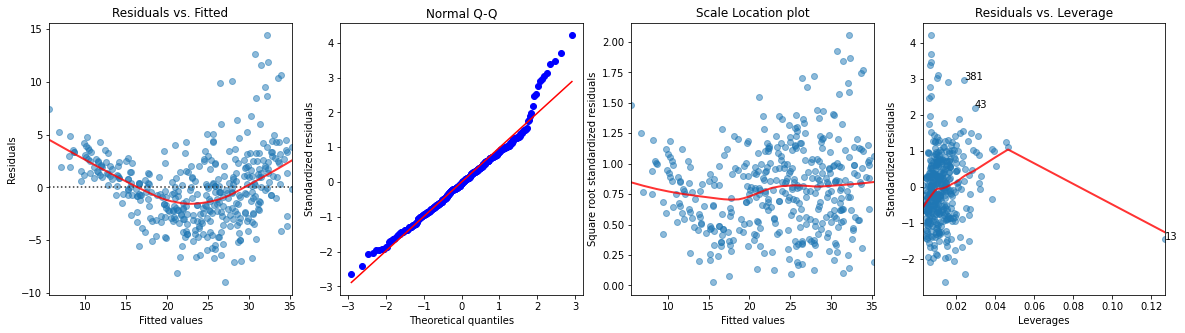

In [30]:
# Let's plot out the diagnostic plots 
diagnostic_plots(sm.OLS(y, X).fit()) 

The Residuals indicating Non-linearity relationship. 

In [31]:
# Let's try fitting the model with X2
formula = 'mpg ~ cylinders + I(cylinders**2) + displacement + I(displacement**2) + weight + I(weight**2) + year + I(year**2)'

In [32]:
smlr = smf.ols(formula=formula, data = auto).fit()
print(smlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.07e-160
Time:                        03:33:06   Log-Likelihood:                -970.98
No. Observations:                 392   AIC:                             1960.
Df Residuals:                     383   BIC:                             1996.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              361.3347 

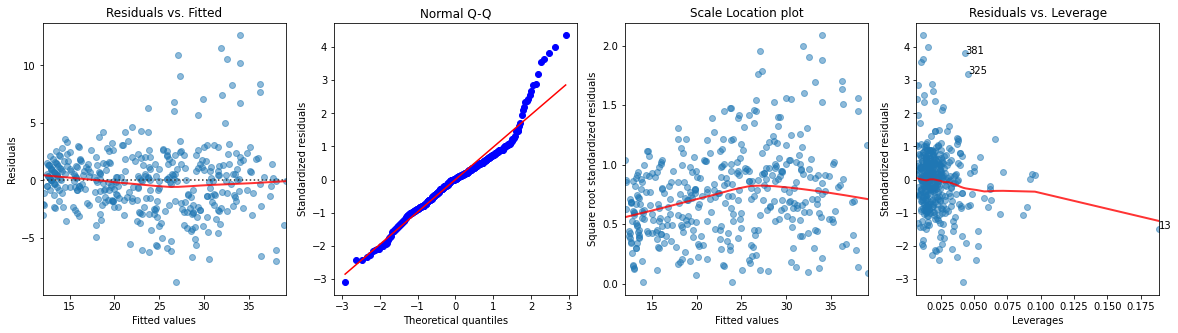

In [33]:
diagnostic_plots(smlr)

The Residuals vs. Fitted values suggests that the squared model is a much better prediction than that of the linear model.

The Scale Location plot still indicates heterodasticity, non-constant variances in the errors. To fix this, we would change the response Y to log(Y).

In [34]:
formula = 'np.log(mpg) ~ cylinders + I(cylinders**2) + displacement + I(displacement**2) + weight + I(weight**2) + year + I(year**2)'

In [35]:
logmlr = smf.ols(formula = formula, data=auto).fit()
print(logmlr.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     386.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          3.22e-178
Time:                        03:33:07   Log-Likelihood:                 299.40
No. Observations:                 392   AIC:                            -580.8
Df Residuals:                     383   BIC:                            -545.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.0500 

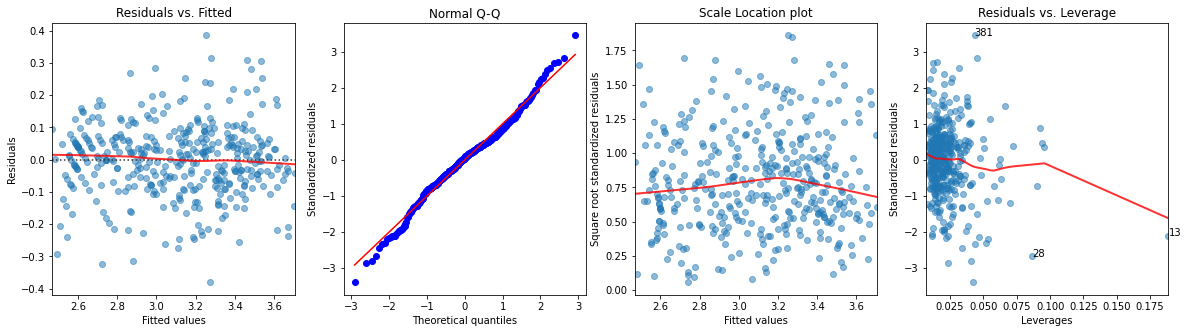

In [36]:
diagnostic_plots(logmlr)

To deal with the high leverage and large outliers value, let's drop the three leverages.

In [37]:
auto = auto.drop([13, 381, 28])

In [38]:
nloglmr = smf.ols(formula = formula, data=auto).fit()
print(nloglmr.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     397.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.37e-179
Time:                        03:33:08   Log-Likelihood:                 307.40
No. Observations:                 389   AIC:                            -596.8
Df Residuals:                     380   BIC:                            -561.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.4209 

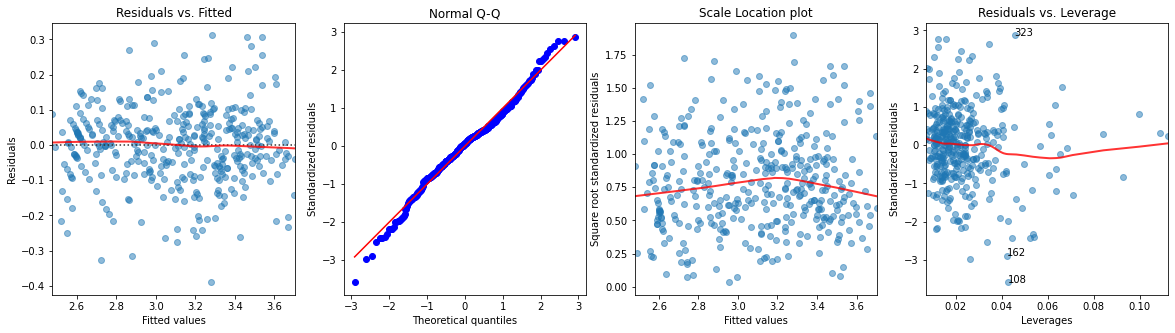

In [39]:
diagnostic_plots(nloglmr)

Let's add the most significant interaction terms: 

In [40]:
formula = 'np.log(mpg) ~ cylinders + I(cylinders**2) + displacement + I(displacement**2) + weight + I(weight**2) + year + I(year**2) + displacement*year'

In [41]:
final_mlr = smf.ols(formula = formula, data=auto).fit()
print(final_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     352.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          4.78e-178
Time:                        03:33:10   Log-Likelihood:                 307.42
No. Observations:                 389   AIC:                            -594.8
Df Residuals:                     379   BIC:                            -555.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.7241 

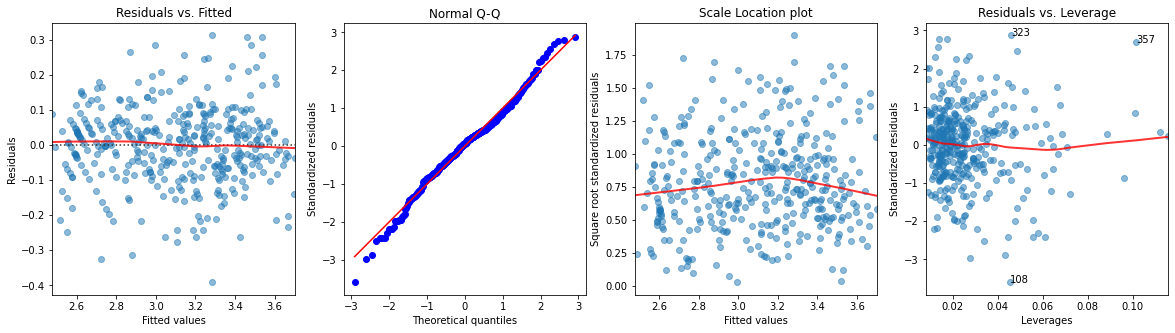

In [42]:
diagnostic_plots(final_mlr)

# ``CARSEATS`` DATASET

## Question 10

In [43]:
carseats = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv').drop('Unnamed: 0', axis = 1)

In [44]:
# Get the information on the dataset
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [45]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(a) Fit a multiple regression model to predict ``Sales`` using ``Price``, ``Urban`` and ``US``.

Since ``Urban`` and ``US`` are qualitative predictor, we'll use Label Encoder to change it into 0 and 1.

In [46]:
le = LabelEncoder()
carseats.Urban = le.fit_transform(carseats['Urban'])

In [47]:
carseats.US = le.fit_transform(carseats.US)

In [48]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [49]:
X = sm.add_constant(carseats[['Price', 'Urban', 'US']])
y = carseats['Sales']

mrm = sm.OLS(y, X).fit()
print(mrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.39e-23
Time:                        03:33:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

(b) Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!

``Price`` = -0.0545

For an increase in 1 unit of ``Price``, there will be a -0.0545 increase in ``Sales``.

``Urban`` = -0.0219

If the store is in an Urban area, there is a -0.0219 increase in ``Sales``.
However, the p-values for the F-statistics is quite high, so it's safe to conclude that we fail to reject the null hypothesis (there is a relationship between ``Urban`` and ``Sales``)

``US`` = 1.2006

If the store is located in the US, there is a 1.2006 increase in ``Sales``.


(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$Y = -0.0545X_{price} - 0.0219X_{Urban} + 1.20006X_{US}$$ 


Where 

$$X_{Urban} = 1$$ if the location is in Urban, else 0
$$X_{US} = 1$$ if the location is in US, else 0


(d) For which of the predictors can you reject the null hypothesis $$H_0: \beta_j = 0$$

Two predictors that have a large enough F-statistics and a small enough p-values are ``Price`` and ``US``.

(e) On the basis of your response to the previous question, fit a smaller model that uses only the predictors for which there is evidence of association with the outcome.

In [50]:
X = sm.add_constant(carseats[['Price', 'US']])
y = carseats['Sales']

smlr = sm.OLS(y, X).fit()
print(smlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.66e-24
Time:                        03:33:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

The adjusted R-squared of (e) is slightly higher than (a) while the R-squared is slightly lower. This can be explained by R-squared will always increase or decrease depending on the numbers of variables. 

So, model (e) fits the data better than (a).

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

The 95% confidence intervals for the coefficients:

``Price``: -0.065 - -0.044

``US``: 0.692 - 1.708

(h) Is there evidence of outliers or high leverage observations in the model from(e)?

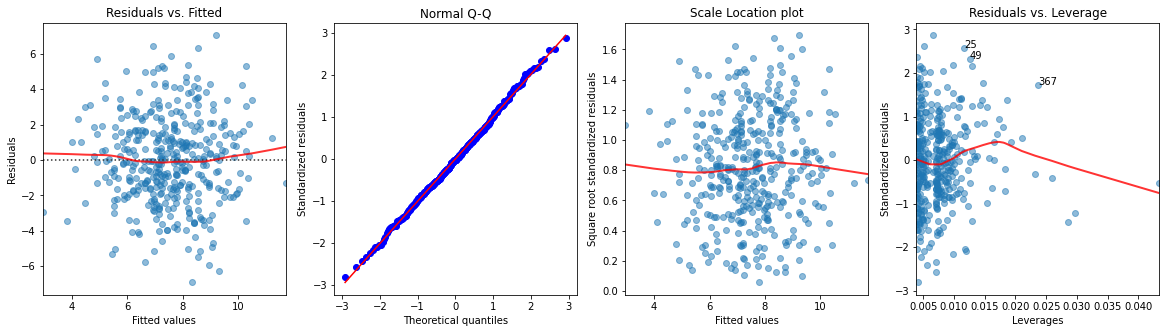

In [51]:
diagnostic_plots(smlr)

Given that there are only 2 variables, these high leverages may not be an issue.

# SIMPLE RANDOM DATASET 

## Question 11

Let's generate a predictor ``X`` and a response ``y``

In [52]:
random.seed(1)
X = np.random.rand(100,1)
y = 2*X + np.random.rand(100,1) # true relationship between y and x

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0:βa=0. Comment on these results.

In [53]:
rmlr = sm.OLS(y, X).fit()
print(rmlr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              1686.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                    5.48e-64
Time:                        03:33:12   Log-Likelihood:                         -46.223
No. Observations:                 100   AIC:                                      94.45
Df Residuals:                      99   BIC:                                      97.05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model strongly suggests that there are a relationship between X and y. 

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic, and p-values associated with the null hypothesis: H0:βa=0. Comment on the results.

In [54]:
smlr = sm.OLS(X, y).fit()
print(smlr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              1686.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                    5.48e-64
Time:                        03:33:12   Log-Likelihood:                          60.221
No. Observations:                 100   AIC:                                     -118.4
Df Residuals:                      99   BIC:                                     -115.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The models still suggests a strong relationship between x and y.

(c) What is the relationship between the results obtained in (a) and (b)?



The relationship between x and y are represented in these two equations:
$$ y = 2x + \epsilon$$
AND 
$$ x = \frac{y-\epsilon}{2}$$

This explains why R_squared, F-statistics and p-values are the same, however the coefficients are different. 


(d) For the regression of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form:
$$\frac{\hat{\beta}}{SE(\hat{\beta})}$$

where β is given by:

$$\hat{\beta} = \frac{\sum{xy}}{\sum{x^2}}$$


AND:

$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i-x_i\hat{\beta})^2}{(n-1)\sum_{i'=1}^nx_{i'}^2}}$$

Proof that:

$$t = \frac{\sqrt{n-1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i'=1}^ny_{i'}^2) - (\sum_{i'=1}^nx_{i'}y_{i'})^2}}$$

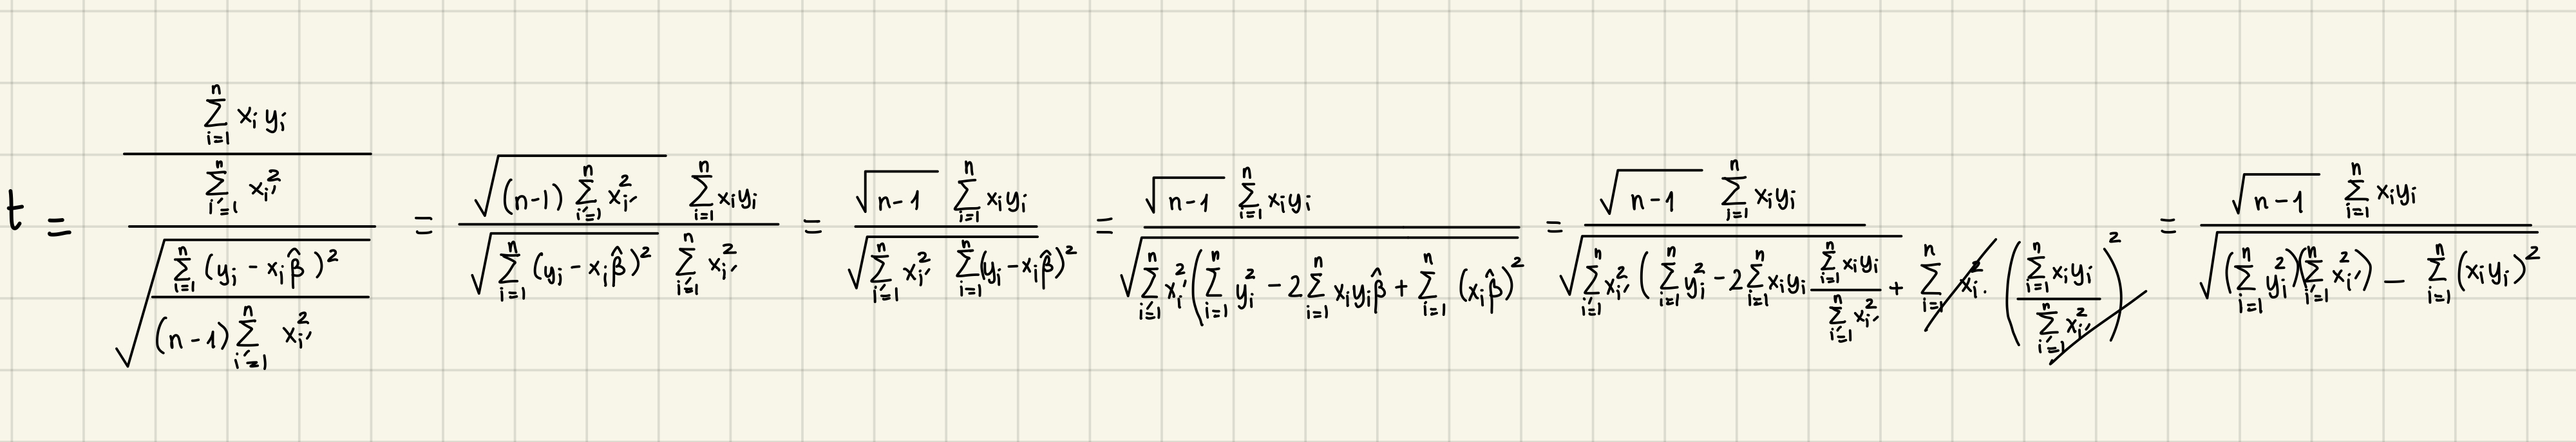

In [55]:
# Confirm numerically
n = 100
t_statistics = (np.sqrt(n-1)*np.sum(X*y))/np.sqrt((np.sum(X**2))*(np.sum(y**2)) - (np.sum(X*y))**2)
print(t_statistics) # which matches the t-statistics shown in the summary above

41.065418772120466


(e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

As we can see clearly in the formula for the t-statistics, if you switch the places of x and y, the formula would stay the same based on the multiplication property. So as expected, the t-statistics for both model are the same.

(f) Show that when regression is performed with an intercept, the t-statistic for H0:β=0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [56]:
np.random.seed(1)
X = np.random.rand(100,1)
y = 2*X + np.random.rand(100,1)
X = sm.add_constant(X)

smlr = sm.OLS(y, X).fit()
print(smlr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     330.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           3.49e-33
Time:                        03:33:12   Log-Likelihood:                -26.736
No. Observations:                 100   AIC:                             57.47
Df Residuals:                      98   BIC:                             62.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4978      0.062      8.078      0.0

In [57]:
np.random.seed(1)
X = np.random.rand(100,1)
y = sm.add_constant(2*X + np.random.rand(100,1))

smlr = sm.OLS(X, y).fit()
print(smlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     330.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           3.49e-33
Time:                        03:33:12   Log-Likelihood:                 54.203
No. Observations:                 100   AIC:                            -104.4
Df Residuals:                      98   BIC:                            -99.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0836      0.034     -2.432      0.0

As clearly, when regression is performed with an intercept, the t-statistic is the same for the regression of y onto x as it is for the regression of x onto y.

## Question 12

This problem involves simple linear regression without an intercept. 

(a) Recall that the coefficient estimate β for the linear regression of Y onto X without an intercept is given by:

$$\hat{\beta} = \frac{\sum{xy}}{\sum{x^2}}$$

Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

There are circumstances that the coefficient estimate for the regression of Y onto would be the same as the regression of X onto Y:
- When y = x
- When either x or y = 0

(b) Generate an example with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

This will be the same as question 11.

(c) Generate an example with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [58]:
np.random.seed(1)
X = np.random.rand(100,1)
y = X

mlr_1 = sm.OLS(y, X).fit()
print(mlr_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.911e+33
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                        0.00
Time:                        03:33:12   Log-Likelihood:                          3516.5
No. Observations:                 100   AIC:                                     -7031.
Df Residuals:                      99   BIC:                                     -7028.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
np.random.seed(1)
X = np.random.rand(100,1)
y = X

mlr_1 = sm.OLS(X, y).fit()
print(mlr_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.911e+33
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                        0.00
Time:                        03:33:12   Log-Likelihood:                          3516.5
No. Observations:                 100   AIC:                                     -7031.
Df Residuals:                      99   BIC:                                     -7028.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Question 13

In this exercise you will create some simulated data and will fit simple linear regression models to it. 

(a) Create a vector ``x`` containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X. 

In [123]:
np.random.seed(1)
X = np.random.rand(100,)
X.shape

(100,)

(b) Create a vector ``esp`` containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean 0 and variance 0.25

In [124]:
np.random.seed(1)
esp = np.random.normal(0, 0.5, (100,))

(c) Using ``x`` and ``esp``, generate a vector ``y`` according to the model:
$$y = -1 + 0.5x + \epsilon$$

What is the length of the vector y? What are the values of 𝛽0 and 𝛽1 in this linear mode?

In [125]:
y = -1 + 0.5*X + esp
print(y.shape)

(100,)


$$\beta_0 = -1$$
AND 
$$\beta_1 = 0.5$$

(d) Create a scatterplot displaying the relationship between ``X`` and ``y``. Comment on what you observe.

In [126]:
X = pd.Series(X)
y = pd.Series(y)
df = pd.DataFrame({'X': X, 'y': y})
df.head()

,X,y
0,0.417022,0.020684
1,0.720324,-0.945716
2,0.000114,-1.264029
3,0.302333,-1.385318
4,0.146756,-0.493918


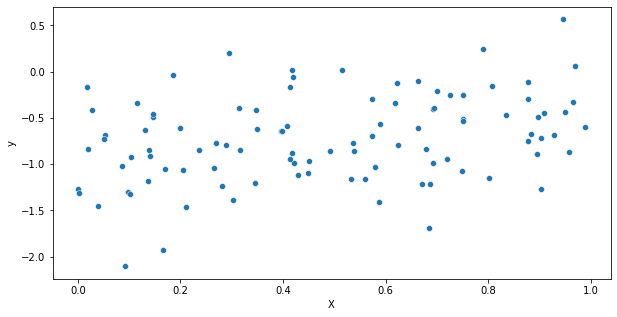

In [127]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = 'X', y = 'y')
plt.show()

- There is a positive linear relationship between ``X`` and ``y``
- However there is a weak relationship (from a large amount of noise)

(e) Fit a least squares linear model to predict ``y`` using ``X``. Comment on the model obtained. How do the predicted coefficients compare to the true ones?

In [128]:
X_1 = sm.add_constant(X)
mlr = sm.OLS(y, X_1).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     11.53
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           0.000992
Time:                        07:02:12   Log-Likelihood:                -60.375
No. Observations:                 100   AIC:                             124.7
Df Residuals:                      98   BIC:                             130.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9773      0.086    -11.328      0.0

They are very close to the true predictions.

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


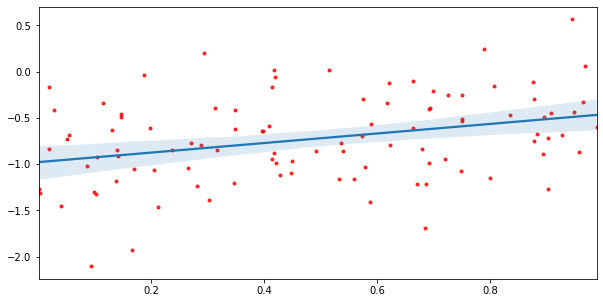

In [129]:
relation_plot(X,y)

(g) Now fit a polynomial regression model that predicts ``y`` using ``x`` and ``x2``. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [130]:
formula = 'y ~ X + I(X**2)'

mpr = smf.ols(formula, data=df).fit()
print(mpr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     5.720
Date:                Tue, 13 Jul 2021   Prob (F-statistic):            0.00448
Time:                        07:02:24   Log-Likelihood:                -60.360
No. Observations:                 100   AIC:                             126.7
Df Residuals:                      97   BIC:                             134.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9622      0.125     -7.701      0.0

The p-value for the x2 term is too high to reject the null hypothesis that the coefficient is 0. 

(h) Repeat (a)-(f) after modifying the data generation process in such a way that there is less noise in the data. You can do this by decreasing the variance of the normal distribution. 

In [132]:
np.random.seed(1)
esp_1 = np.random.normal(0, 0.25, (100,))

In [133]:
y_1 = -1 + 0.5*X + esp_1

In [134]:
X_2 = sm.add_constant(X)
mlr = sm.OLS(y_1, X_2).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     44.73
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.40e-09
Time:                        07:03:44   Log-Likelihood:                 8.9400
No. Observations:                 100   AIC:                            -13.88
Df Residuals:                      98   BIC:                            -8.670
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9886      0.043    -22.920      0.0

With less noise, there is a significant improvement in the R-squared. 

(i) Repeat everything after modifying the data generation process in such a way that there is more noise in the data. 

In [137]:
np.random.seed(1)
esp_2 = np.random.normal(0, 0.75, (100,))
y_2 = -1 +  0.5*X + esp_2
X_3 = sm.add_constant(X)

In [138]:
mlr_2 = sm.OLS(y_2, X_3).fit()
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.279
Date:                Tue, 13 Jul 2021   Prob (F-statistic):             0.0237
Time:                        07:08:05   Log-Likelihood:                -100.92
No. Observations:                 100   AIC:                             205.8
Df Residuals:                      98   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9659      0.129     -7.464      0.0

(j) What are the confidence intervals for the coefficients based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

- On the original data set: 0.214 - 0.817
- On the less noisy data set: 0.357 - 0.658
- On the more noisy data set: 0.071 - 0.975

## Question 14

This problem focuses on the ``collinearity`` problem.

(a) Generating the new dataset. Creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [186]:
np.random.seed(1)
x1 = pd.Series(np.random.rand(100,))
x2 = pd.Series(0.5*x1 + np.random.rand(100,)/10)
y = 2 + 2*x1 + 0.3*x2 + np.random.rand(100,)

The regression coefficients:

$$\beta_1 = 2$$
$$\beta_2 = 0.3$$
$$\beta_0 = 2$$ 

(b) What is the correlation between ``x1`` and ``x2``? Create a scatterplot displaying the relationship between the variables.

When we increase ``x1``, ``x2`` will also increase.

In [149]:
x1.corr(x2)

0.9774739841819383

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


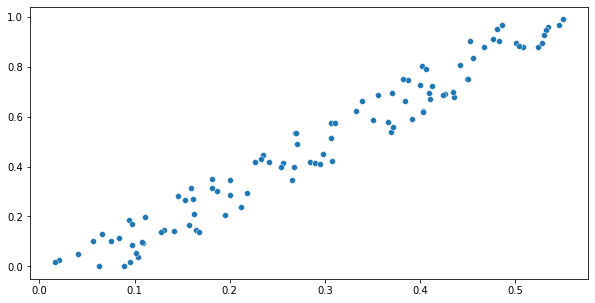

In [150]:
plt.figure(figsize=(10,5))
sns.scatterplot(x2,x1)
plt.show()

(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are the predicted coefficients? How do these related to the true coefficients? Can you reject the null hypothesis: 
$$H_0 = \beta_1 = 0$$ 
AND 
$$H_0 = \beta_2 = 0$$

In [151]:
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'y':y})
df.head()

,x1,x2,y
0,0.417022,0.241175,3.856573
1,0.720324,0.412868,4.121163
2,0.000114,0.088651,2.942431
3,0.302333,0.186893,3.302299
4,0.146756,0.164231,2.732789


In [153]:
X = sm.add_constant(df[['x1','x2']])

In [154]:
colmlr = sm.OLS(df['y'], X).fit()
print(colmlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           9.92e-39
Time:                        09:29:15   Log-Likelihood:                -13.113
No. Observations:                 100   AIC:                             32.23
Df Residuals:                      97   BIC:                             40.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5435      0.070     36.457      0.0

The predicted coefficients for constant and x1 are closer to the true coefficients while the predicted coefficient for x2 is far off. 

Both the t-statistics and the p-values for x2 is insignificant so that we fail to reject the null hypothesis that the coefficient for x2 is 0.

(d) Now fit a least squares regression to predict ``y`` using only ``x1``. Comment on your results. Can you reject the null hypothesis?

In [155]:
X1 = sm.add_constant(x1)
x1_mlr = sm.OLS(df['y'], X1).fit()
print(x1_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     490.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           6.09e-40
Time:                        09:37:06   Log-Likelihood:                -13.667
No. Observations:                 100   AIC:                             31.33
Df Residuals:                      98   BIC:                             36.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5893      0.054     47.883      0.0

The model sucessfully predict a very close coefficient for both x1 and constant. And since both the t-statistic and p-values are significant, we can reject the null hypothesis.

(e) Now fit a least squares regression to predict ``y`` using only ``x2``. Comment on your results. Can you reject the null hypothesis?

In [157]:
X2 = sm.add_constant(x2)
x2_mlr = sm.OLS(df['y'], X2).fit()
print(x2_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     425.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.04e-37
Time:                        09:39:44   Log-Likelihood:                -19.588
No. Observations:                 100   AIC:                             43.18
Df Residuals:                      98   BIC:                             48.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4213      0.065     37.229      0.0

The null hypothesis can be rejected. 

(f) Do the results obtained in (c) - (e) contradict each other? Explain your answer.

Yes, they do. The model (c) indicates that the coefficient for x2 is not significant but it was found to be significant when testing on the model with itself. This arises from the fact that x1 and x2 are highly correlated. 

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured. 

Re-fit the linear model from (c) to (e) using this new data. What effect does this new observation have on each of the new models? In each model, is this observation an outlier? A high leverage point? Both? Explain your answers.

In [187]:
x1 = x1.append(pd.Series([0.1]), ignore_index=True)
x2 = x2.append(pd.Series([0.8]), ignore_index=True)
y = y.append(pd.Series([6]), ignore_index=True)
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'y':y})

In [188]:
df.tail()

,x1,x2,y
96,0.903380,0.453085,4.320609
97,0.573679,0.310276,3.320068
98,0.002870,0.063113,3.007492
99,0.617145,0.403474,3.536945
100,0.100000,0.800000,6.000000


In [189]:
X = sm.add_constant(df[['x1','x2']])
colmlr = sm.OLS(df['y'], X).fit()
print(colmlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.07e-38
Time:                        10:16:20   Log-Likelihood:                -19.557
No. Observations:                 101   AIC:                             45.11
Df Residuals:                      98   BIC:                             52.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4069      0.063     38.026      0.0

In [190]:
X1 = sm.add_constant(x1)
x1_mlr = sm.OLS(df['y'], X1).fit()
print(x1_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           6.78e-25
Time:                        10:16:23   Log-Likelihood:                -55.260
No. Observations:                 101   AIC:                             114.5
Df Residuals:                      99   BIC:                             119.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6878      0.080     33.415      0.0

In [191]:
X2 = sm.add_constant(x2)
x2_mlr = sm.OLS(df['y'], X2).fit()
print(x2_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     488.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           4.68e-40
Time:                        10:16:27   Log-Likelihood:                -19.761
No. Observations:                 101   AIC:                             43.52
Df Residuals:                      99   BIC:                             48.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4061      0.063     38.137      0.0

With the newly added values, we are now instead fail to reject the null hypothesis that coefficient for x1 is 0. 

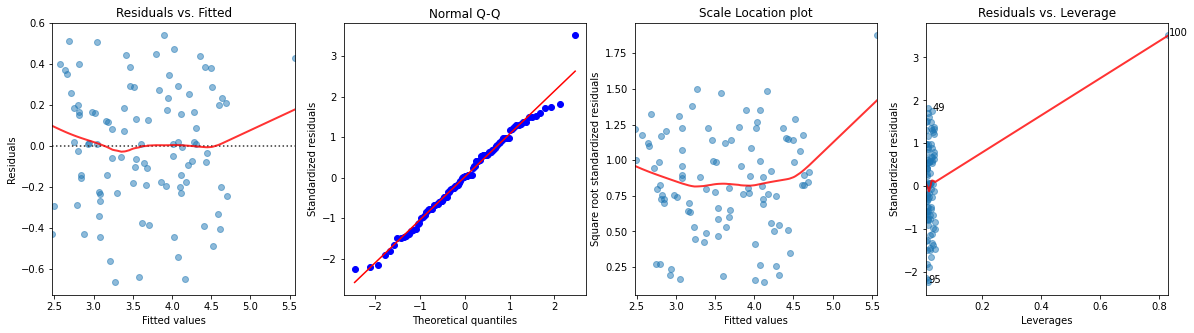

In [192]:
diagnostic_plots(colmlr)

Plotting out the Residuals vs. Leverage plot, clearly indicating that this newly added point is a leverage point and also a large outlier.

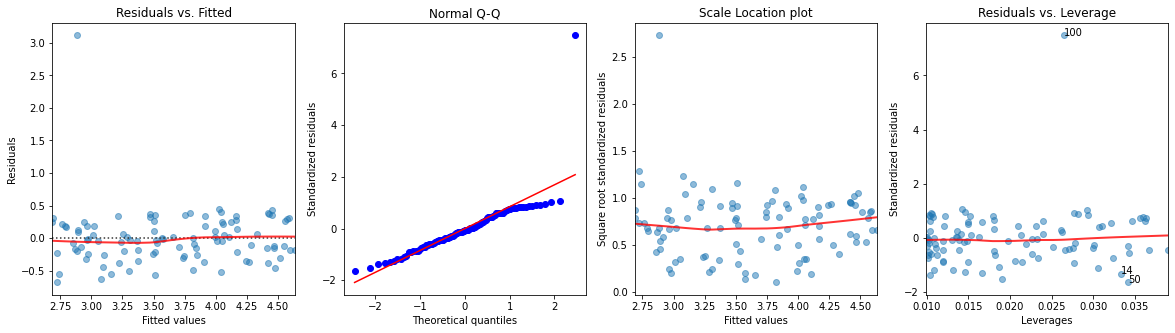

In [193]:
diagnostic_plots(x1_mlr)

For model with only x1, the newly added point is not a high leverages but more than a large outlier.

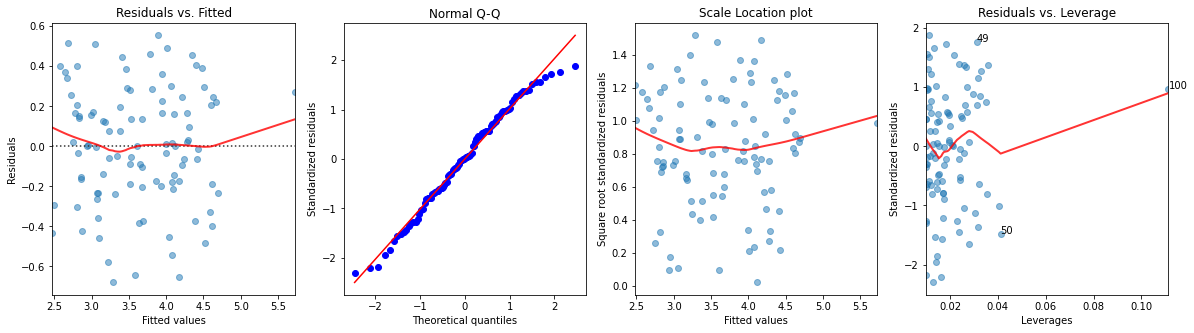

In [194]:
diagnostic_plots(x2_mlr)

For model with only x2, the newly added point is a high leverage.

# ``BOSTON`` DATASET

## Question 15

This problem involves the ``Boston`` data set. We will now try to predict per capita per crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors. 

In [195]:
# Load the dataset
boston = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv')

In [196]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [197]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


1. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [214]:
X = boston.drop('crim', axis = 1)
y = boston['crim']
coefs = []

for i in X.columns:
  print(i)
  print(sm.OLS(y, sm.add_constant(X[i])).fit().summary())
  coefs.append(sm.OLS(y, sm.add_constant(X[i])).fit().params[1]) # storing all of the simple linear regression

zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           5.51e-06
Time:                        12:59:43   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      

Below are the predictors that DIDN'T return a statistically significant association with the response:

- chas


(b) Fit a multiple regression model to predict the response using all the predictors. Describe your results. For which predictors can we reject the null hypothesis?

In [204]:
bmlr = sm.OLS(y, sm.add_constant(X)).fit()
print(bmlr.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.57e-56
Time:                        12:31:02   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

In [212]:
# Storing all the coefficients 
coef_mult = bmlr.params[1:]

The predictors we can reject the null hypothesis are: (p_value < 0.05)
- zn
- dis
- rad
- black
- lstat
- medv

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

There are fewer variables that is statistical significant enough from (b) compare to (a).

In [ ]:
data_coef = pd.DataFrame({'x': np.array(coefs), 'y': coef_mult})

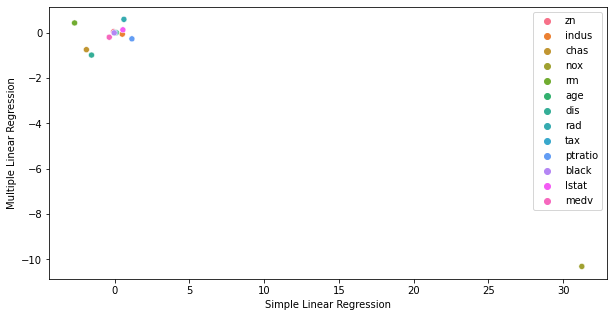

In [230]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = np.array(coefs), y = coef_mult, hue = data_coef.index)
plt.xlabel('Simple Linear Regression')
plt.ylabel('Multiple Linear Regression')
plt.show()

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit the model of the form: 

$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$$

In [235]:
X = boston.drop('crim', axis = 1)
y = boston['crim']
formula 
for i in X.columns:
  print(smf.ols(formula=f'y~poly({i},3)', data = boston).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.28e-06
Time:                        14:12:00   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6135      0.372      9.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


The predictors that are statistically significant for this cubic model:
- medv
- ptratio
- dis
- age
- nox
- indus